## Домашнее задание к лекции «Feature Selection» 

### Задание

<b>Цель:</b><br>Изучить методы отбора признаков для эффективного обучения моделей машинного обучения.<p>
<b>Описание задания:</b><br>
В домашнем задании нужно решить задачу классификации точек наиболее эффективно. Для этого в работе <br>
необходимо применить различные методы по отбору признаков. Отбор признаков предпочтительнее осуществлять <br>
основываясь на математическом аппарате, поэтому данные для этого задания будут сгенерированы, чтобы избежать признаков с физическим смыслом.

<b>Этапы работы:</b>
1. Сгенерируйте данные с помощью кода:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1)
2. Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:
cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()
3. Используйте статистические методы для отбора признаков:<br>
a) Выберите признаки на основе матрицы корреляции.<br>
b) Отсеките низковариативные признаки (VarianceThreshold).<br>
c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.<br>
4.Осуществите отбор признаков на основе дисперсионного анализа:<br>
a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).<br>
b) Повторите п. 2 на отобранных признаках.<br>
5. Отбор с использованием моделей:<br>
a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.<br>
b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.<br>
c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.<br>
6. Перебор признаков: <br>
a) SequentialFeatureSelector.<br>
b) Повторите п. 2 на отобранных признаках.<br>
7. Сформулируйте выводы по проделанной работе:<br>
a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.<br>

<b>Для получения зачета по этому домашнему заданию минимально должны быть:<b><br>
* сгенерированы данные;
* использовано хотя бы три метода для отбора признаков;
* выведена средняя точность модели на каждом множестве отобранных признаков.    

    
<b>Результат:</b>
Получены знания по основным методам отбора признаков.
<p>

<b>Форма выполнения:</b>
- Ссылка на Jupyter Notebook, загруженный на GitHub
- Ссылка на Google Colab
- Файл с расширением .ipynb<p>

   
<b>Инструменты:</b>
- Jupyter Notebook/Google Colab;
- GitHub;

    
<b>Срок выполнения:</b> дедлайн приема решений на проверку
    
<b><i>Рекомендации к выполнению: </b></i><br>
- Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
- У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, 
чем стандартный вывод, чтобы увеличить читабельность.
- Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
- Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

___

#### Решение

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

> ##### Сгенерируйте данные с помощью кода

In [2]:
from sklearn.datasets import make_classification 
x_data_generated, y_data_generated = make_classification(scale=1, random_state = 20)


In [3]:
x_data_generated

array([[ 0.2352516 , -0.51106318,  1.07248827, ..., -0.53943076,
        -0.62693734,  0.59382268],
       [-1.68352512,  0.54336201,  0.54875104, ..., -0.3193538 ,
         1.04912894,  1.93036545],
       [ 0.65502401,  0.38018617,  1.27903742, ..., -1.15484467,
        -2.31829879,  0.70141771],
       ...,
       [-0.42912016,  1.06142503,  0.94181067, ...,  0.64606136,
        -0.79967464,  0.47043851],
       [-0.10279969, -0.75404442, -0.3181401 , ...,  0.44040322,
         0.63838534,  2.38392356],
       [-0.74033184, -0.93507537,  0.68117193, ..., -0.57739461,
         0.54333357,  0.22075737]])

In [4]:
y_data_generated

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1])

> ##### Постройте модель логистической регрессии и оцените среднюю точность.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline

> * код из задания (оценка средней точности):

In [6]:
def mean_val_score(x, y = y_data_generated, model = LogisticRegression()):
    return cross_val_score(model, x, y, scoring='accuracy').mean()


In [7]:
mean_val_score(x_data_generated)

0.8400000000000001

> ##### Используем статистические методы для отбора признаков

> Выбераем признаки на основе матрицы корреляции.

In [8]:
# для начала соберем датафрейм
data = pd.DataFrame(x_data_generated, columns=[f"X{i}" for i in range(1, x_data_generated.shape[1]+1)])
data["Y"] = y_data_generated
print(data.shape)
data.head()

(100, 21)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
0,0.235252,-0.511063,1.072488,-3.064112,0.531708,-0.092560,0.346461,-1.077363,0.890717,1.276980,...,-0.774075,-0.118293,-1.068632,0.591133,-1.070922,-0.360473,-0.539431,-0.626937,0.593823,0
1,-1.683525,0.543362,0.548751,1.294181,0.897284,-0.430511,-2.198107,0.605602,0.451151,0.623515,...,0.564955,0.358521,1.322549,-1.267503,-1.132205,0.687847,-0.319354,1.049129,1.930365,1
2,0.655024,0.380186,1.279037,-1.678089,1.065818,0.924303,-0.510638,-0.938201,0.231249,0.169062,...,-0.085140,-0.439212,0.976294,-0.153485,-0.700117,0.463136,-1.154845,-2.318299,0.701418,1
3,1.037039,-0.306612,1.196029,-0.357117,1.261437,0.139072,1.497510,0.252869,-0.430975,-1.079602,...,1.012946,0.498277,-1.625030,-0.039822,0.743177,1.507755,-0.989437,0.906601,-0.061275,1
4,0.059534,-0.959403,-2.937409,-1.142344,-3.539212,-0.788920,0.684064,-1.658126,1.213262,-0.242620,...,1.493146,0.969932,0.497533,0.731546,-0.629163,-0.935829,1.643641,0.745694,0.975766,0


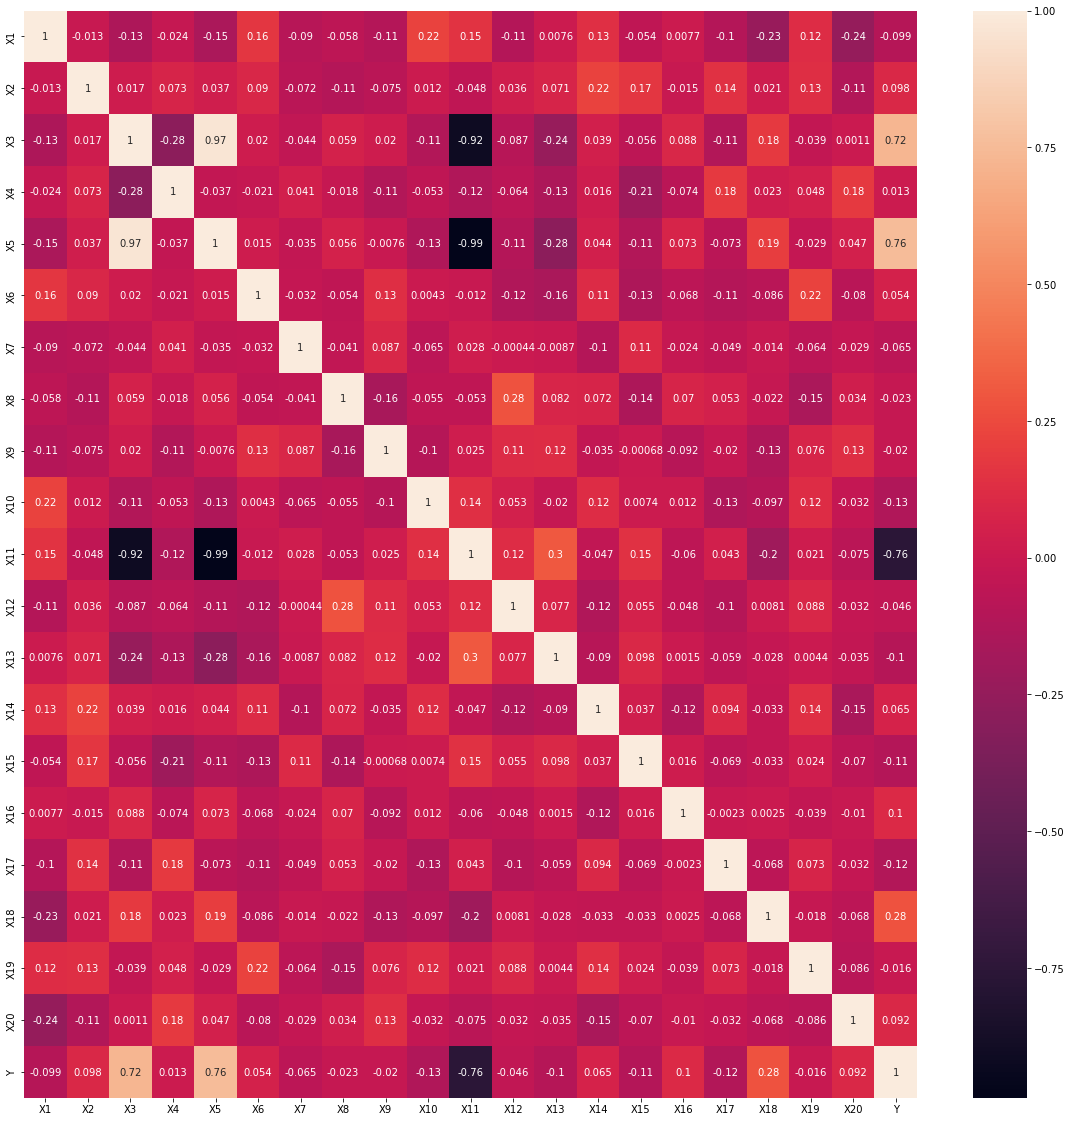

In [9]:
corr = data.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr,annot = True)
plt.show()

* Из матрицы видим, что сильную корреляцию показывают признаки **Х3, Х5** и, ***Х18*** - но уже слабые, но еще может сойти, остальные либо стремятся к нулю, либо меньше 0

In [10]:
selected_features = corr[(corr["Y"] > 0.5)].index.tolist()
selected_features.remove("Y")
X_cor = data[selected_features]
X_cor.head()

,X3,X5
0,1.072488,0.531708
1,0.548751,0.897284
2,1.279037,1.065818
3,1.196029,1.261437
4,-2.937409,-3.539212


In [11]:
mean_val_score(X_cor)

0.89

* Оставил два признака, так как удаление или наличие X18 не влияет на результат

> Отсеките низковариативные признаки (VarianceThreshold).

In [12]:
from sklearn.feature_selection import VarianceThreshold

In [13]:
vt = VarianceThreshold(threshold=0.5)
vt.fit(x_data_generated)
selected_features = vt.get_support(indices=True)
x_vt = x_data_generated[:, selected_features]
x_vt.shape

(100, 19)

In [14]:
mean_val_score(x_vt)

0.8400000000000001

> ##### Осуществите отбор признаков на основе дисперсионного анализа:<br>
a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).<br>
b) Повторите п. 2 на отобранных признаках.

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif

sel = SelectKBest(f_classif, k = 5)
x_skb = sel.fit_transform(x_data_generated, y_data_generated)
x_skb.shape

(100, 5)

In [16]:
mean_val_score(x_skb)

0.89

> ##### Отбор с использованием моделей

 Реализуйте отбор признаков с помощью логистической регрессии. <br>
а) Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию. <br>
b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.


In [17]:
# LogisticRegression
logreg = LogisticRegression(penalty = 'l1', solver = 'liblinear', random_state = 20)

In [18]:
from sklearn.feature_selection import SelectFromModel

sel_sfm = SelectFromModel(logreg, prefit = False, max_features = 5, threshold = -np.inf)
x_sfm = sel_sfm.fit_transform(x_data_generated, y_data_generated)
x_sfm.shape

(100, 5)

In [19]:
mean_val_score(x_sfm)

0.8699999999999999

In [20]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 20)

In [21]:
sel_sfm_rf = SelectFromModel(rf, prefit = False, max_features = 5, threshold = -np.inf)
x_sfm_rf = sel_sfm_rf.fit_transform(x_data_generated, y_data_generated)
x_sfm_rf.shape

(100, 5)

In [22]:
mean_val_score(x_sfm_rf)

0.86

> ##### Перебор признаков:
a) SequentialFeatureSelector.

In [23]:
from sklearn.feature_selection import SequentialFeatureSelector

In [24]:
sfs_forward = SequentialFeatureSelector(
    RandomForestClassifier(random_state = 20), n_features_to_select = 10, direction = "forward"
)
x_sfs = sfs_forward.fit_transform(x_data_generated, y_data_generated)
x_sfs.shape

(100, 10)

In [25]:
mean_val_score(x_sfs)

0.8099999999999999

In [26]:
from prettytable import PrettyTable

In [27]:
table = PrettyTable()
table.field_names = ["способ выбора признаков", "количество признаков", "средняя точность модели"]
table.add_row(["LogisticRegression", x_data_generated.shape[1], round(mean_val_score(x_data_generated),2)])
table.add_row(["матрица корреляции", X_cor.shape[1], round(mean_val_score(X_cor), 2)])
table.add_row(["VarianceThreshold", x_vt.shape[1], round(mean_val_score(x_vt), 2)])
table.add_row(["SelectKBest", x_skb.shape[1], round(mean_val_score(x_skb), 2)])
table.add_row(["LogReg, L1 регуляризаци (SelectFromModel)", x_sfm.shape[1], round(mean_val_score(x_sfm), 2)])
table.add_row(["RandomForestClassifier (SelectFromModel)", x_sfm_rf.shape[1], round(mean_val_score(x_sfm_rf), 2)])
table.add_row(["RandomForestClassifier (SequentialFeatureSelector)", x_sfs.shape[1], round(mean_val_score(x_sfs), 2)])
table.valign = "m"
print(table.get_string())

+----------------------------------------------------+----------------------+-------------------------+
|              способ выбора признаков               | количество признаков | средняя точность модели |
+----------------------------------------------------+----------------------+-------------------------+
|                 LogisticRegression                 |          20          |           0.84          |
|                 матрица корреляции                 |          2           |           0.89          |
|                 VarianceThreshold                  |          19          |           0.84          |
|                    SelectKBest                     |          5           |           0.89          |
|     LogReg, L1 регуляризаци (SelectFromModel)      |          5           |           0.87          |
|      RandomForestClassifier (SelectFromModel)      |          5           |           0.86          |
| RandomForestClassifier (SequentialFeatureSelector) |          

***Вывод:***<br>
Из проведенных тестов выбора признаков различными способами, с большой долей вероятности, в нашем случае, матрица корреляции показала лучший вариант, мы сократили размерность до двух признаков при этом средняя точность модели выше остальных тестов.
Но если посмотреть на остальные результаты, где в среднем выборка составила 5 признаков, можно предположить, что при других данных, выбор признаков с помощью матрицы корреляции может привести к искажению результатов и к снижению точности модели.


> Не было в задании, но для наглядности, и подтвержения проведеных выше способов, посмотрим важность признаков с точки зрения методов L1-регуляризации

In [28]:
from sklearn.linear_model import Lasso # линейная модель с L1-регуляризацией
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [29]:
X = data.iloc[:,:20]
Y = data.iloc[:,20]
names = X.columns.tolist()

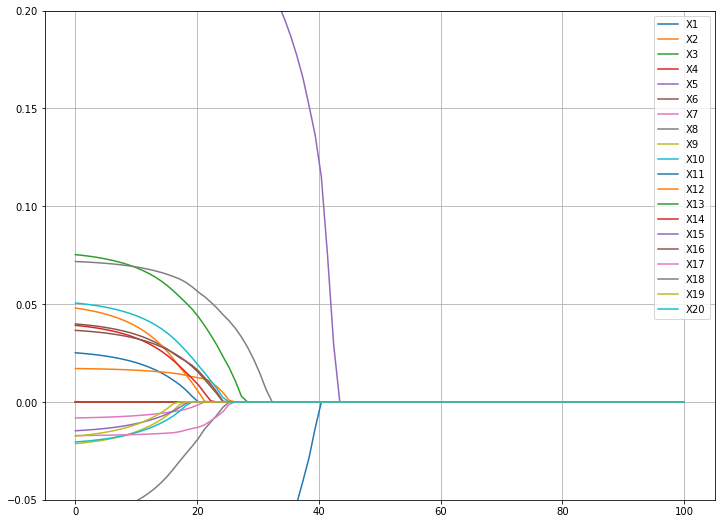

In [30]:
X_sc = StandardScaler().fit_transform(X) # преобразование данных
lg_l,pred_l = [], []

list_l = list(2**np.linspace(-10,10,100))

# строим n-ое кол-во моделей Лассо, меняя коэффициент регуляризации, сохраняя модель и коэффициенты
for i in range(len(list_l)):
    m_l = Lasso(alpha=list_l[i]).fit(X_sc, Y)
    lg_l.append(m_l)
    pred_l.append(m_l.coef_)

# рисуем отмасштабированные признаки на одном графике
plt.figure(figsize=(12,9))
x_l = np.linspace(0,len(pred_l),len(pred_l))
for i in np.vstack(pred_l).T:
    plt.plot(x_l,np.sign(i)*np.abs(i))
     
plt.ylim(-0.05,0.2)  
plt.legend(names)   
plt.grid()

***Вывод 2:*** <br>
Изходя из полученной визуализации, мои предположения выше подтвердились, два признака имеют явно большее влияние, <br>
но это не X3 и Х5, как показала матрица корреляции, а следовательно надо брать те варианты, где выделялись 5 признаков.